In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [2]:
df = df.drop(columns = ['employee_id'])
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# EDA #

In [3]:
#先分析 id 然后drop他


print("We have " + str(df.shape[0]) + " rows")
print("We have " + str(df.shape[1]) + " columns")

We have 54808 rows
We have 13 columns


In [4]:
print(df.dtypes)

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64


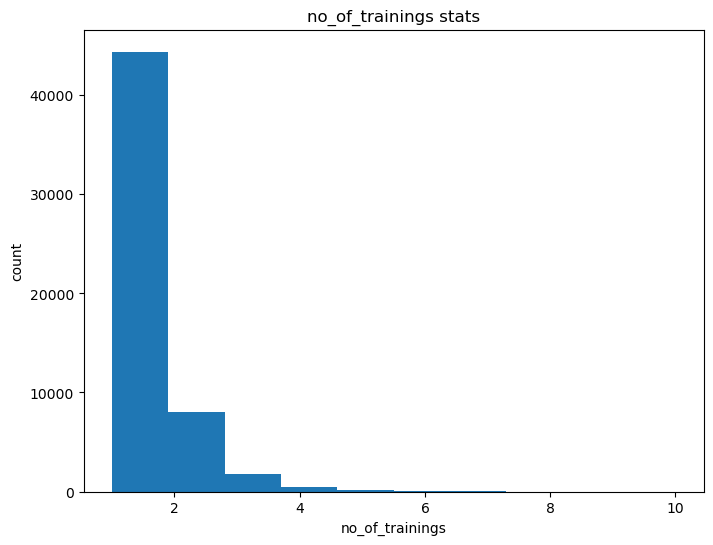

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64


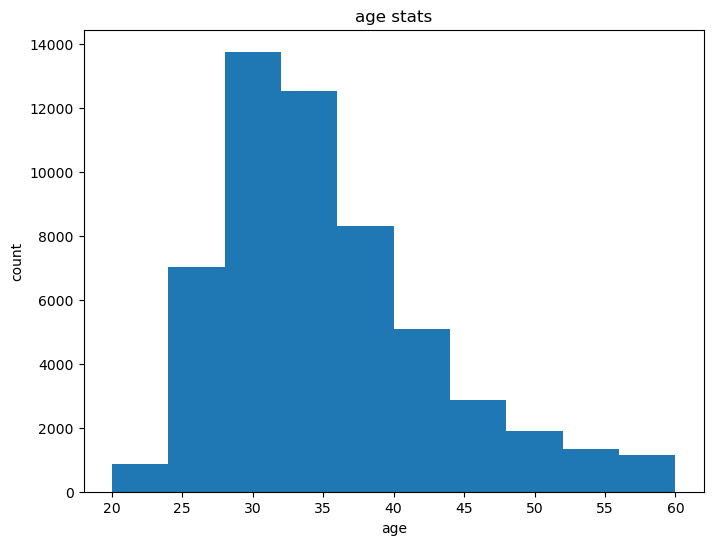

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64


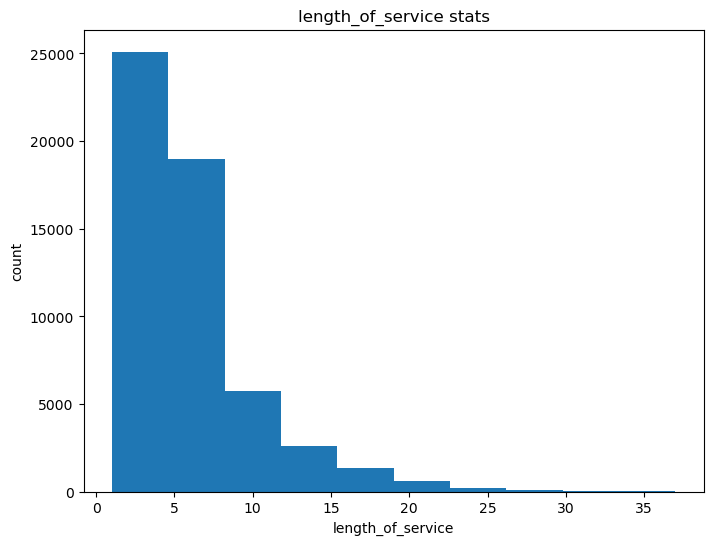

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64


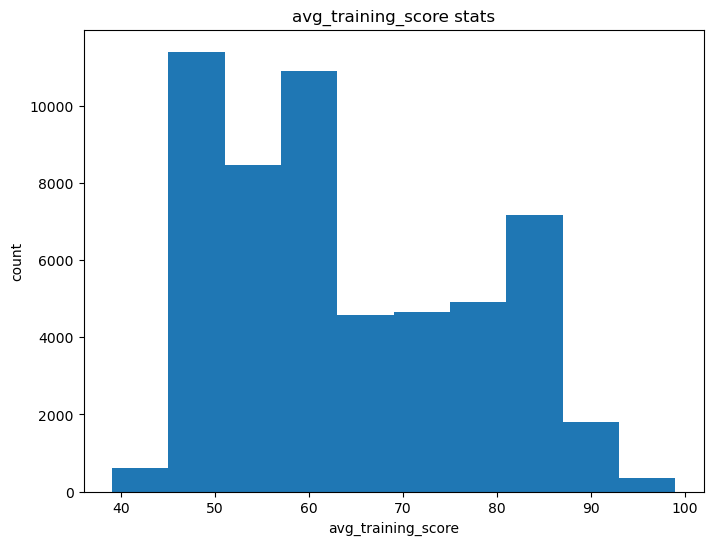

In [5]:
import matplotlib
from matplotlib import pylab as plt

continuous_cols = ['no_of_trainings','age','length_of_service','avg_training_score']

for column in continuous_cols:
    print(df[column].describe())


    plt.figure(figsize=(8,6))

    df[column].plot.hist()   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title(column + ' stats')
    plt.show()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64


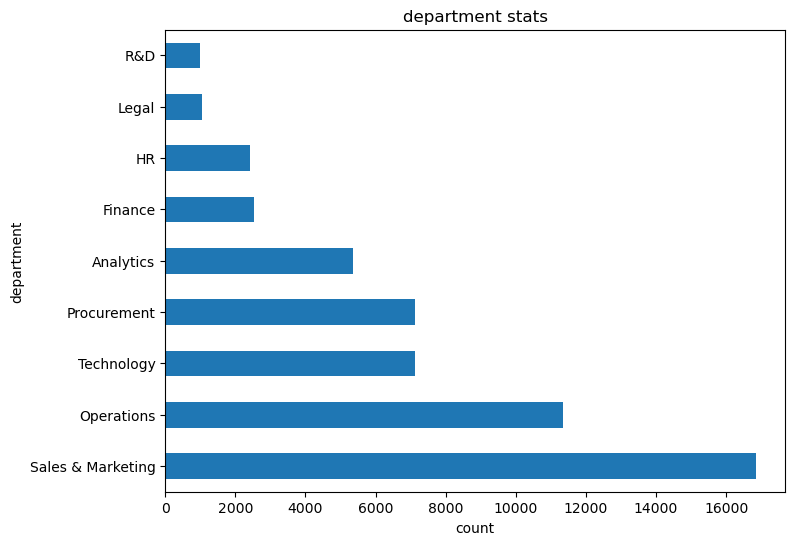

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64


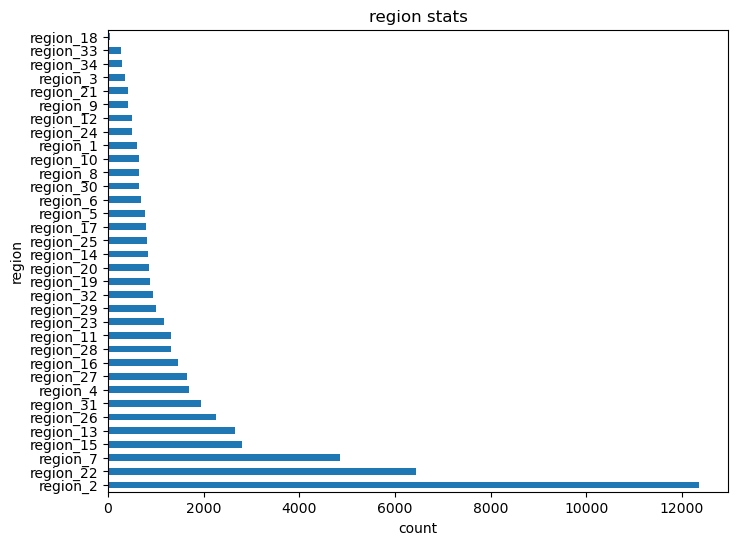

gender
m    38496
f    16312
Name: count, dtype: int64


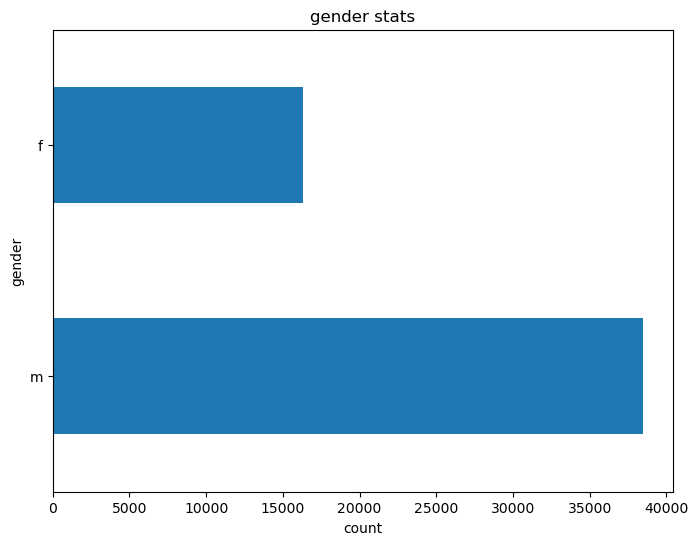

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64


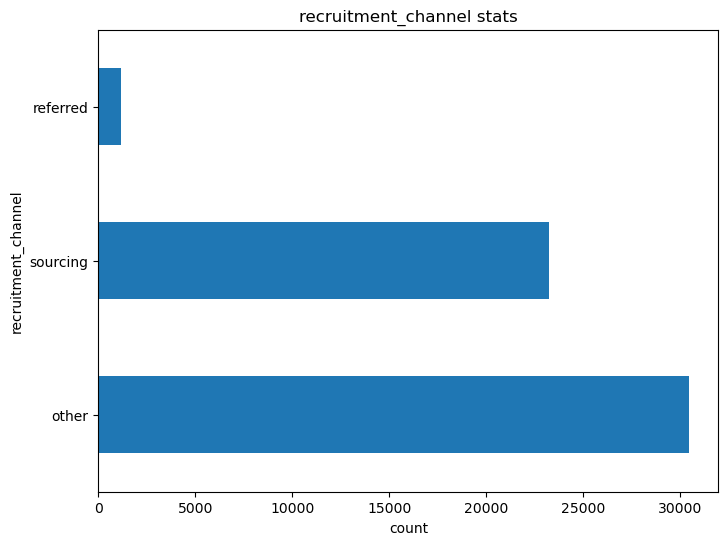

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64


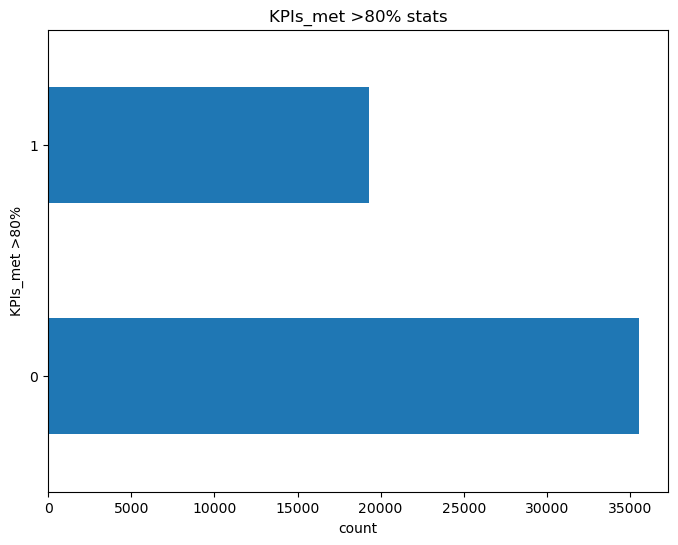

awards_won?
0    53538
1     1270
Name: count, dtype: int64


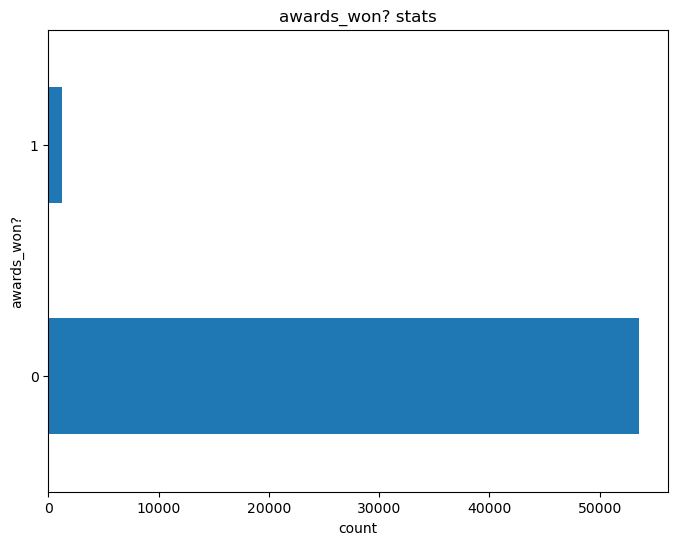

is_promoted
0    50140
1     4668
Name: count, dtype: int64


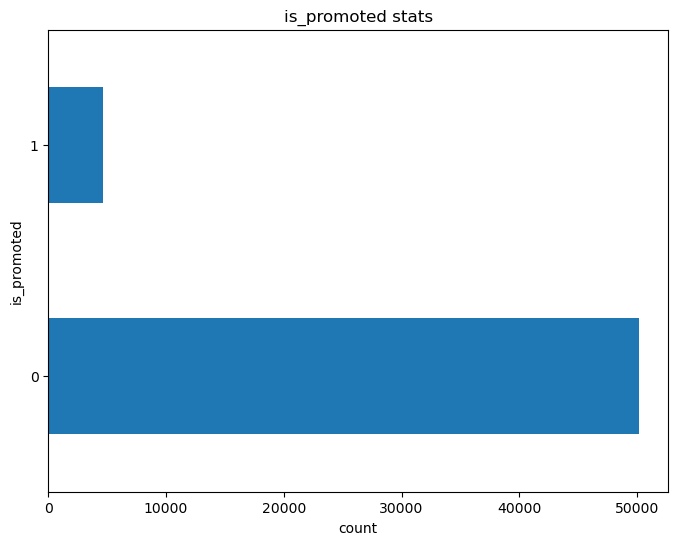

In [6]:
categorical_cols = ['department','region','gender','recruitment_channel','KPIs_met >80%','awards_won?','is_promoted']
for col in categorical_cols:
    print(df[col].value_counts())

    plt.figure(figsize=(8,6))
    pd.value_counts(df[col]).plot.barh()
    plt.xlabel('count')
    plt.ylabel(col)
    plt.title(col + ' stats')
    plt.show()

In [7]:
#education
print(df['education'].value_counts())
correct_order_edu = ["Below Secondary","Bachelor's","Master's & above"]
pd.value_counts(df['education']).reindex(correct_order_edu)


education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


education
Below Secondary       805
Bachelor's          36669
Master's & above    14925
Name: count, dtype: int64

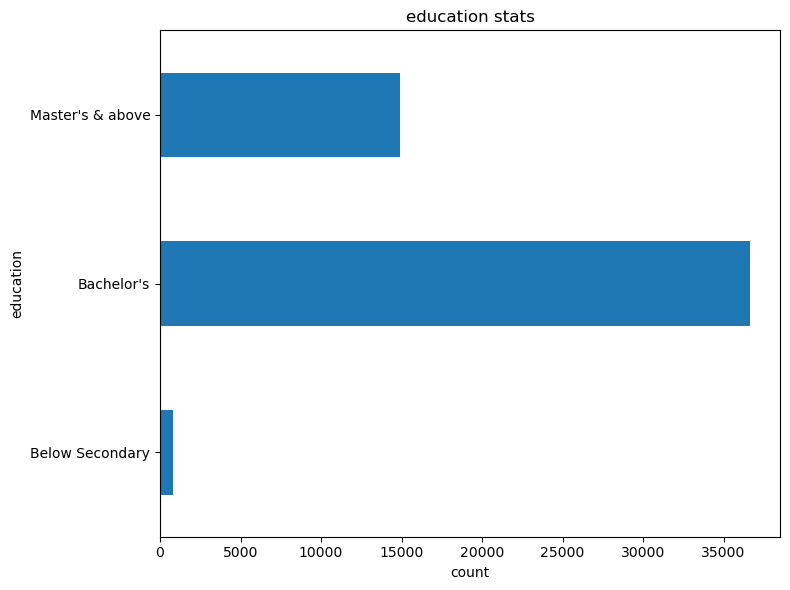

In [8]:
plt.figure(figsize=(8,6))

pd.value_counts(df['education']).reindex(correct_order_edu).plot.barh()
plt.xlabel('count')
plt.ylabel('education')
plt.title('education stats')
plt.tight_layout()
plt.show()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


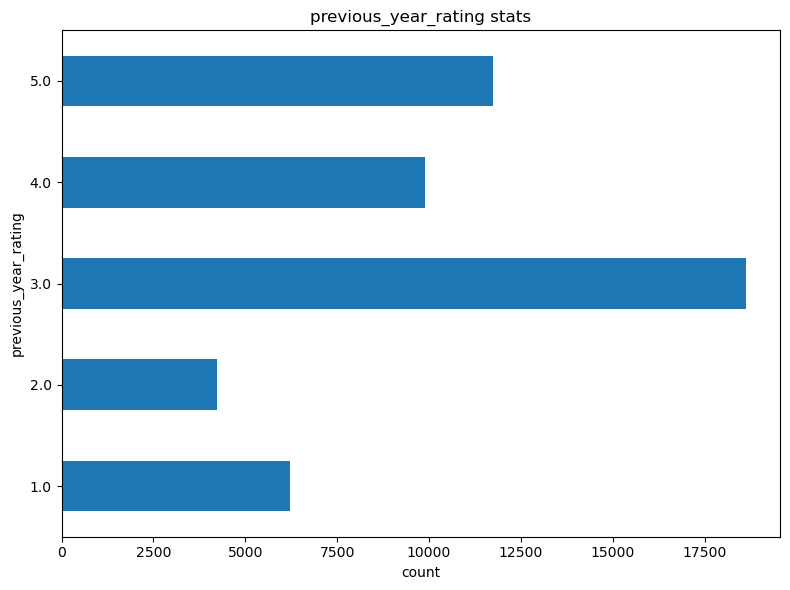

In [9]:
#previous_year_rating
print(df['previous_year_rating'].value_counts())
correct_order_rating = [1.0,2.0,3.0,4.0,5.0]

plt.figure(figsize=(8,6))

pd.value_counts(df['previous_year_rating']).reindex(correct_order_rating).plot.barh()
plt.xlabel('count')
plt.ylabel('previous_year_rating')
plt.title('previous_year_rating stats')
plt.tight_layout()
plt.show()

is_promoted               0         1
department                           
Analytics          0.904335  0.095665
Finance            0.918770  0.081230
HR                 0.943755  0.056245
Legal              0.948989  0.051011
Operations         0.909852  0.090148
Procurement        0.903614  0.096386
R&D                0.930931  0.069069
Sales & Marketing  0.927969  0.072031
Technology         0.892407  0.107593


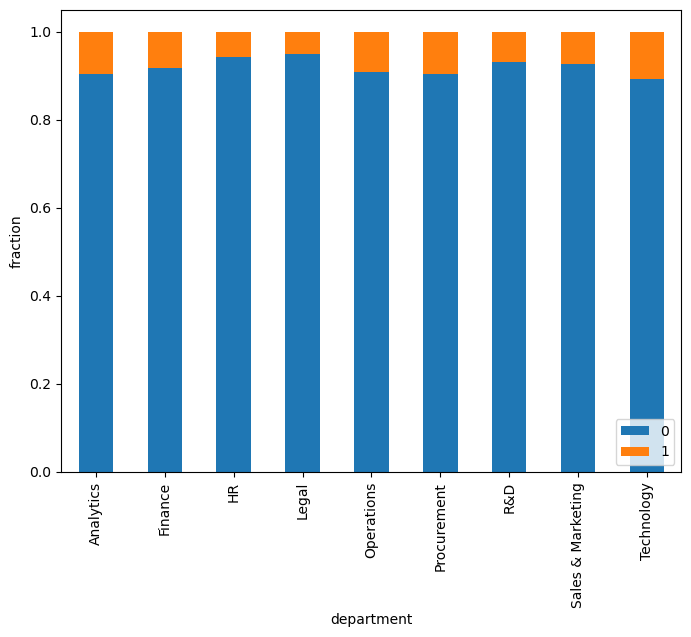


is_promoted         0         1
region                         
region_1     0.904918  0.095082
region_10    0.921296  0.078704
region_11    0.943726  0.056274
region_12    0.934000  0.066000
region_13    0.913142  0.086858
region_14    0.925030  0.074970
region_15    0.920940  0.079060
region_16    0.930375  0.069625
region_17    0.863065  0.136935
region_18    0.967742  0.032258
region_19    0.939359  0.060641
region_2     0.919874  0.080126
region_20    0.942353  0.057647
region_21    0.956204  0.043796
region_22    0.885812  0.114188
region_23    0.883404  0.116596
region_24    0.964567  0.035433
region_25    0.874237  0.125763
region_26    0.936726  0.063274
region_27    0.921037  0.078963
region_28    0.883156  0.116844
region_29    0.956740  0.043260
region_3     0.893064  0.106936
region_30    0.910198  0.089802
region_31    0.943152  0.056848
region_32    0.957672  0.042328
region_33    0.962825  0.037175
region_34    0.972603  0.027397
region_4     0.855549  0.144451
region_

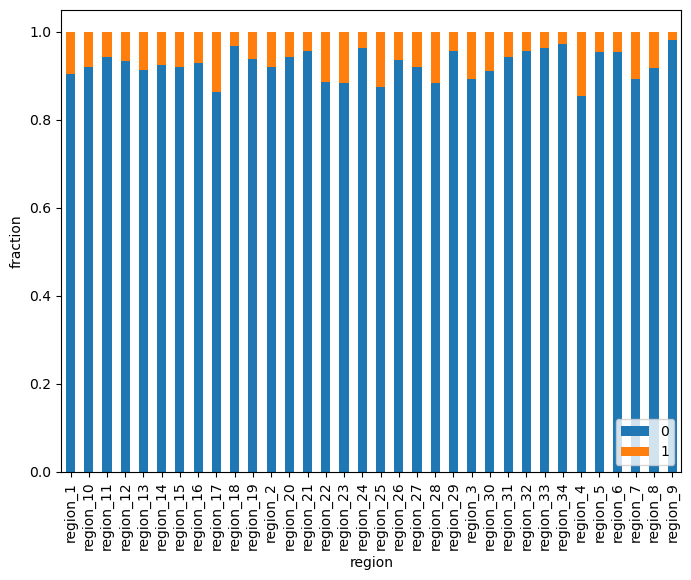


is_promoted         0         1
gender                         
f            0.910066  0.089934
m            0.916849  0.083151


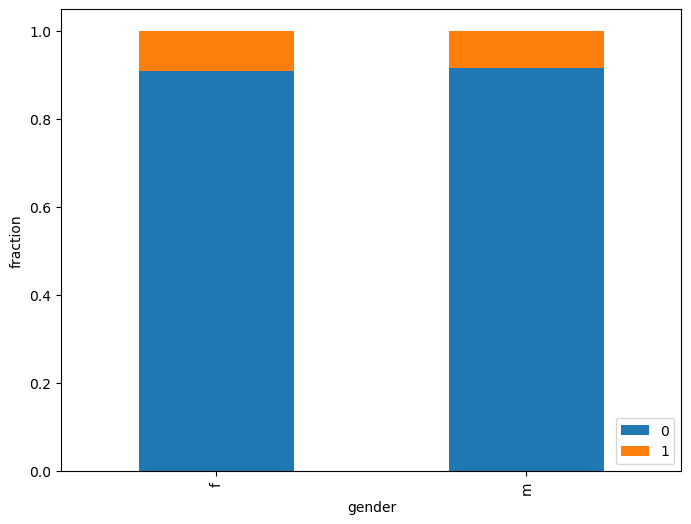


is_promoted                 0         1
recruitment_channel                    
other                0.916048  0.083952
referred             0.879159  0.120841
sourcing             0.914987  0.085013


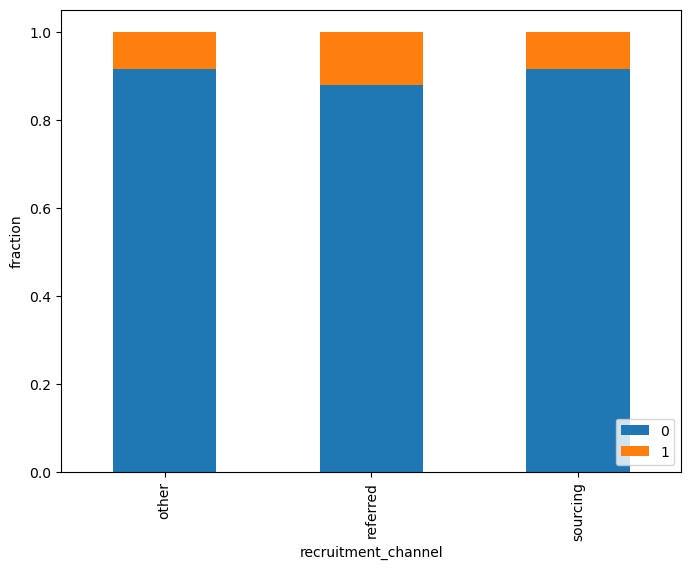


is_promoted           0         1
KPIs_met >80%                    
0              0.960413  0.039587
1              0.830906  0.169094


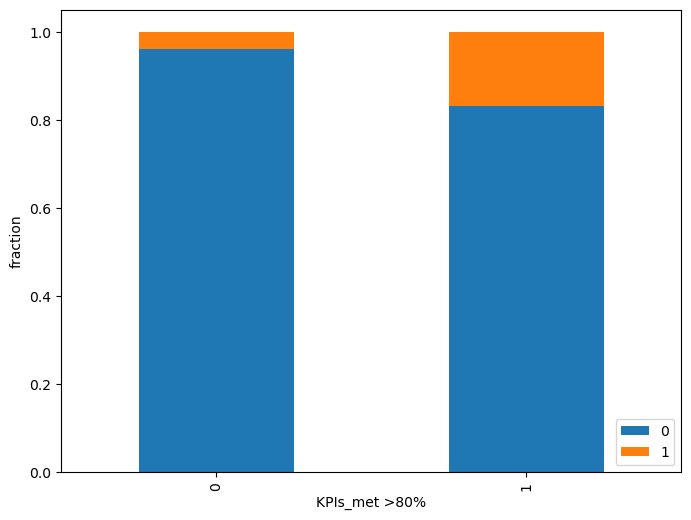


is_promoted         0         1
awards_won?                    
0            0.923251  0.076749
1            0.559843  0.440157


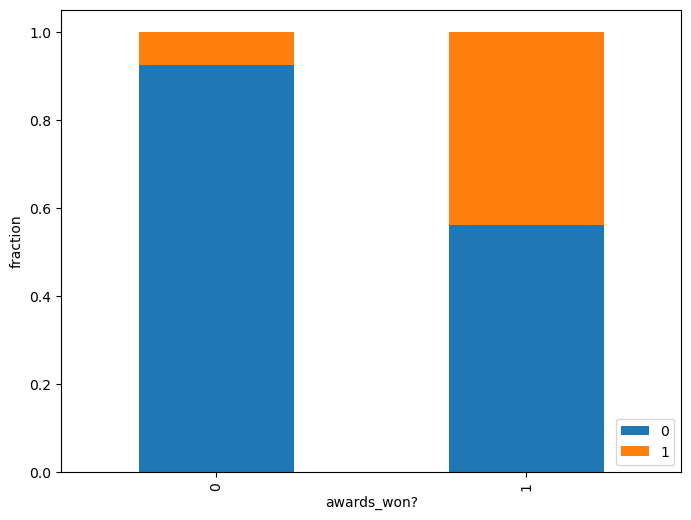


is_promoted    0    1
is_promoted          
0            1.0  NaN
1            NaN  1.0


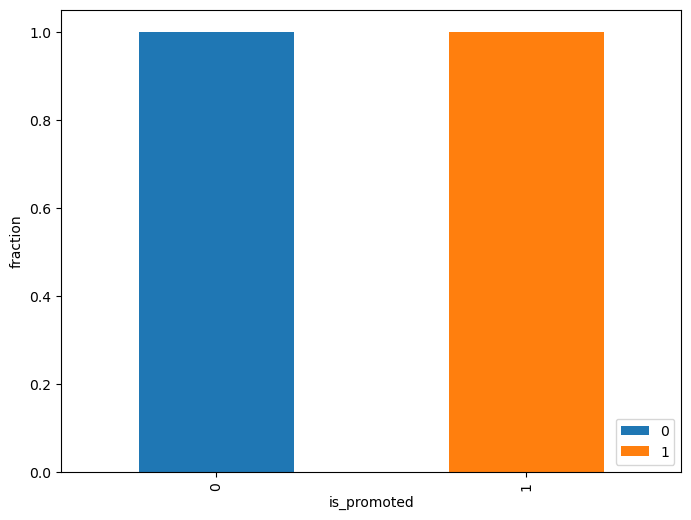


is_promoted              0         1
education                           
Bachelor's        0.917969  0.082031
Below Secondary   0.916770  0.083230
Master's & above  0.901441  0.098559


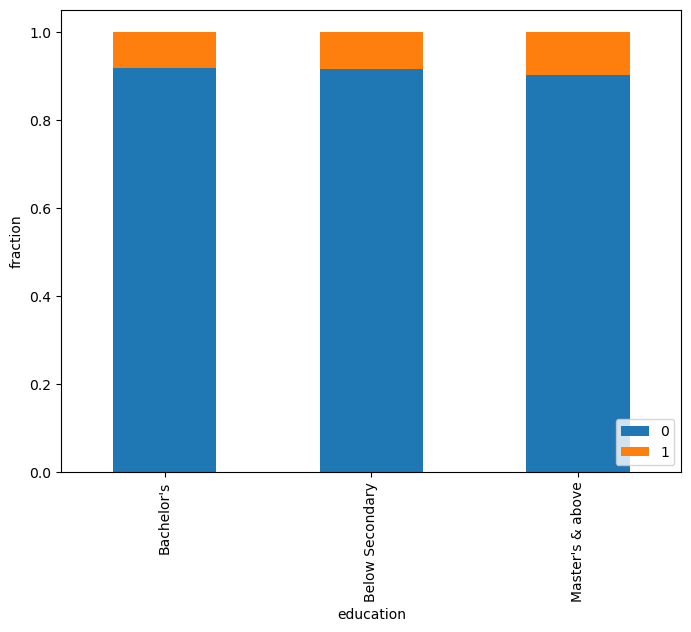


is_promoted                  0         1
previous_year_rating                    
1.0                   0.985859  0.014141
2.0                   0.957160  0.042840
3.0                   0.927221  0.072779
4.0                   0.920624  0.079376
5.0                   0.836385  0.163615


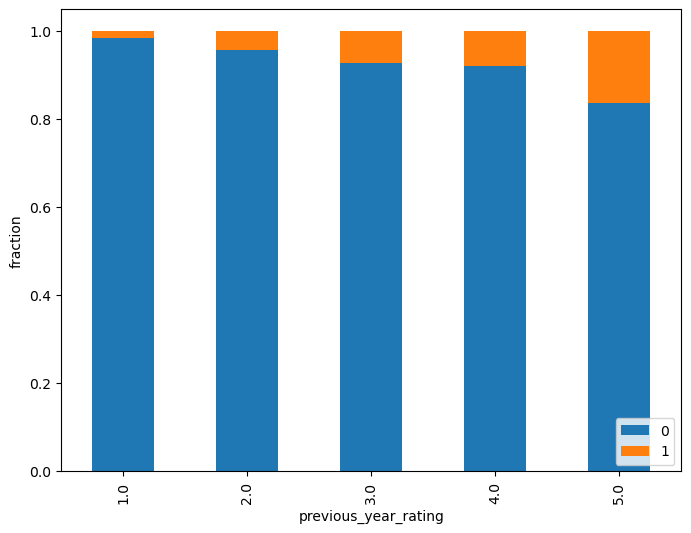

KeyError: 'awards won?'

In [43]:
# Visualization
for col in categorical_cols:
    count_matrix = df.groupby([col,'is_promoted']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    print(count_matrix_norm)
    count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
    plt.ylabel('fraction')
    plt.legend(loc=4)
    plt.show()
    print()

    

count_matrix = df.groupby(['education','is_promoted']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.ylabel('fraction')
plt.legend(loc=4)
plt.show()
print()


count_matrix = df.groupby(['previous_year_rating','is_promoted']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.ylabel('fraction')
plt.legend(loc=4)
plt.show()
print()

count_matrix = df.groupby(['awards_won?','is_promoted']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.ylabel('fraction')
plt.legend(loc=4)
plt.show()
plt.savefig('test.png', bbox_inches='tight')
print()


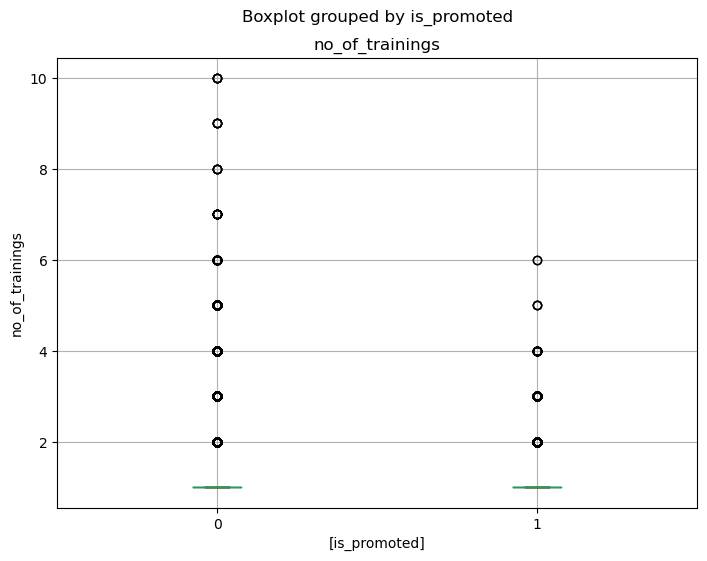

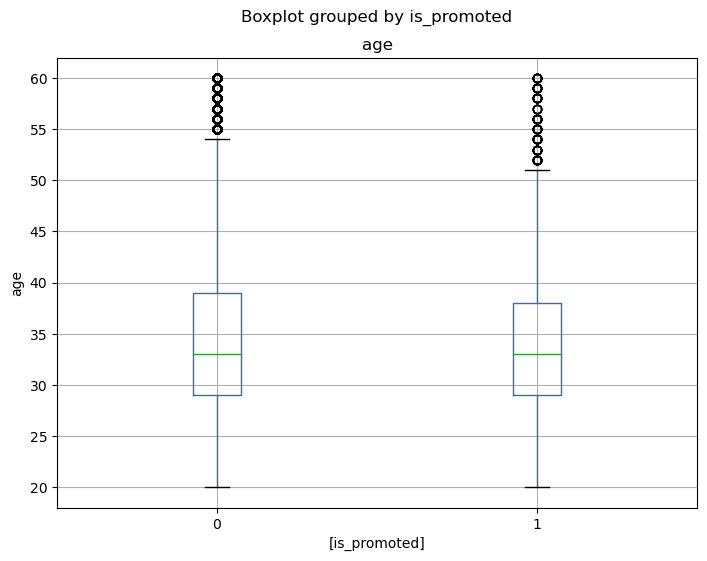

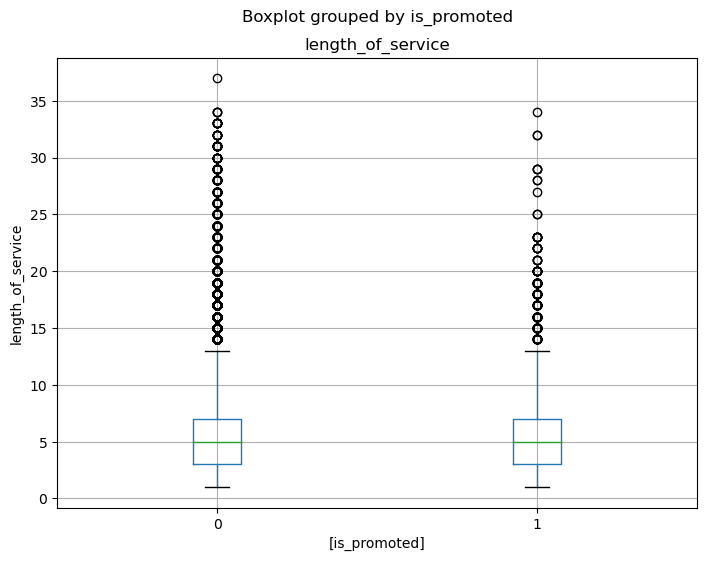

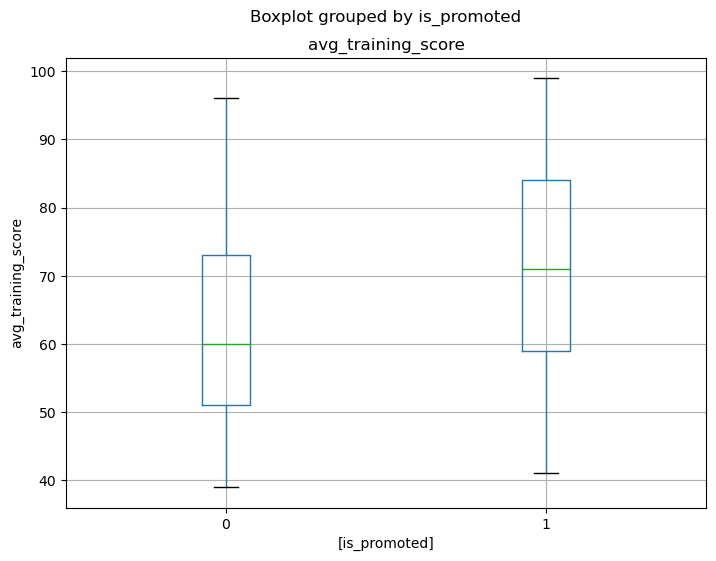

In [11]:

for col in continuous_cols:
    df[[col,'is_promoted']].boxplot(by='is_promoted',figsize=(8,6))
    plt.ylabel(col)
    plt.show()

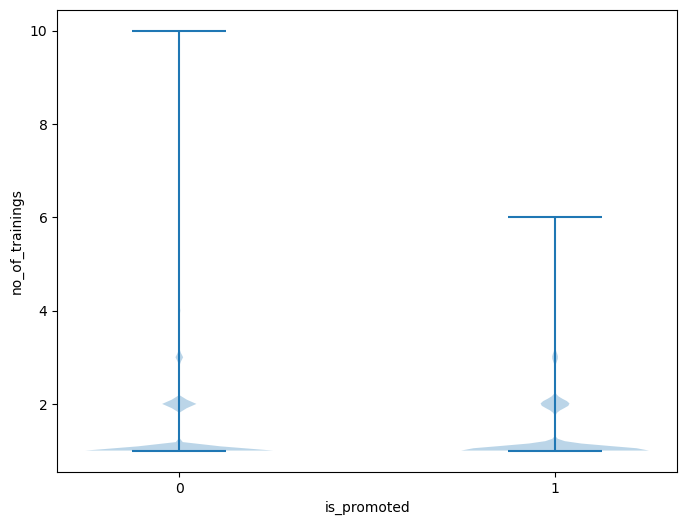

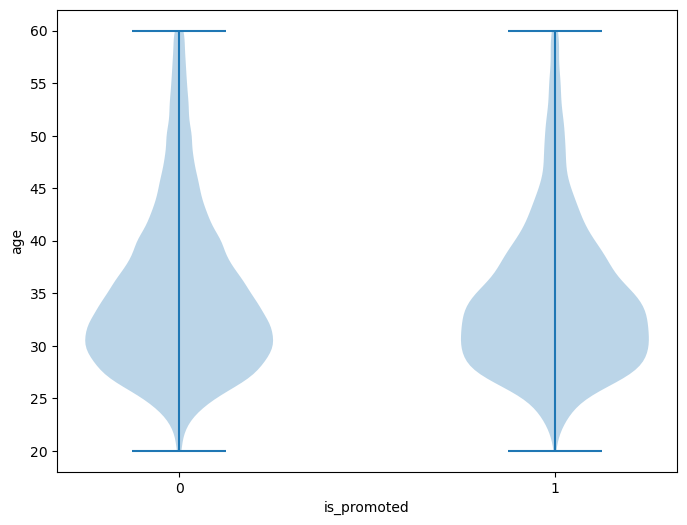

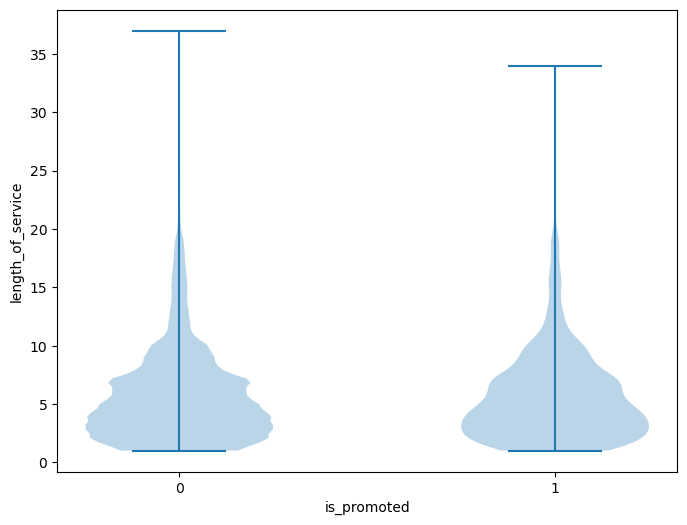

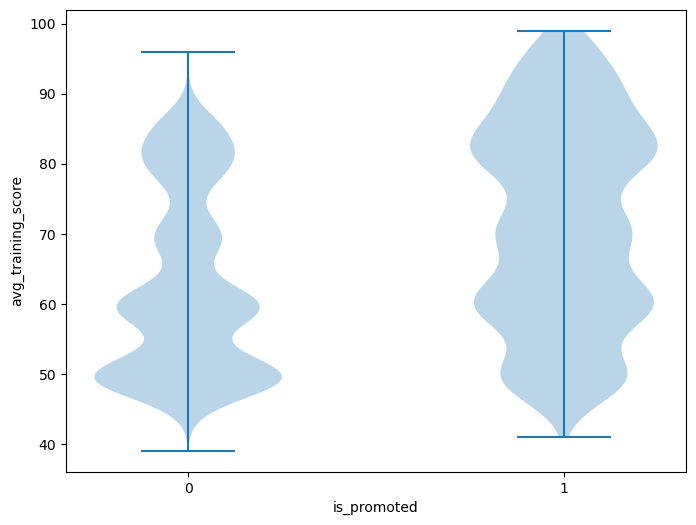

In [45]:
for col in continuous_cols:
    dataset = [df[df['is_promoted']==0][col].values,
           df[df['is_promoted']==1][col].values]

    plt.figure(figsize=(8,6))

    plt.violinplot(dataset = dataset)
    plt.xticks([1,2],[0,1])
    plt.ylabel(col)
    plt.xlabel('is_promoted')
    plt.show()

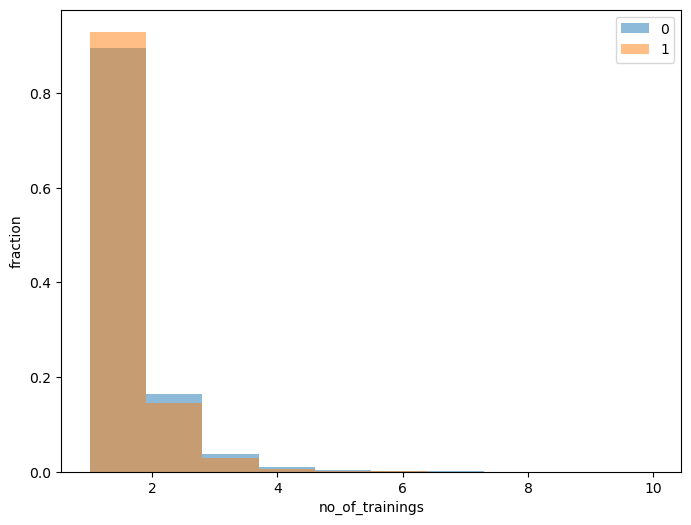

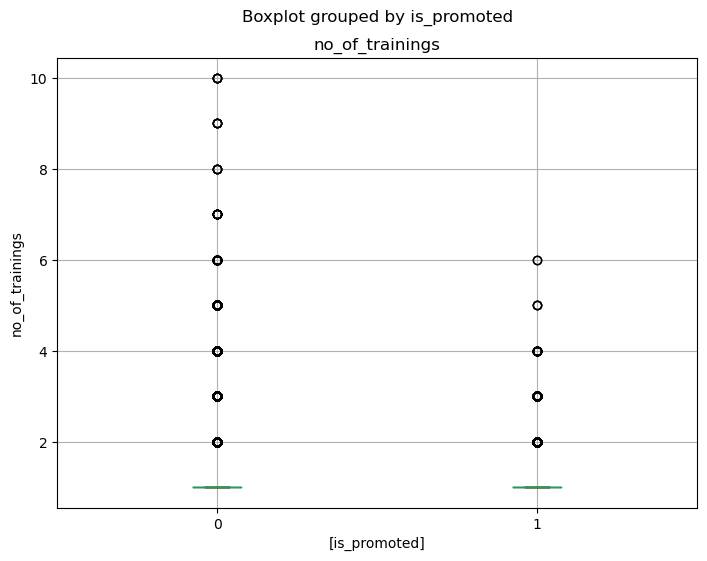

In [42]:
import matplotlib
from matplotlib import pylab as plt

categories = df['is_promoted'].unique()
bin_range = (df['no_of_trainings'].min(),df['no_of_trainings'].max())

plt.figure(figsize=(8,6))

for c in categories:
    plt.hist(df[df['is_promoted']==c]['no_of_trainings'],alpha=0.5,label=c,range=bin_range,bins=10,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('no_of_trainings')
plt.show()

df[['no_of_trainings','is_promoted']].boxplot(by='is_promoted',figsize=(8,6))
plt.ylabel('no_of_trainings')
plt.show()

# Spliiting

In [13]:
#imbalanced data so with stratified Kfold

In [14]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold

random_state = 42

X = df.loc[:, df.columns != 'is_promoted']
y = df['is_promoted']

'''
# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))
    print(X_train)
    print(X_val)'''

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')

print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance with stratification:**
(array([0, 1]), array([40112,  3734]))
(array([0, 1]), array([5014,  467]))
(array([0, 1]), array([5014,  467]))


# Preprocessing

In [36]:
print(X_train.shape)
X_train_r = X_train.dropna()
print(X_train_r.shape)
na_rows = X_train.shape[0] - X_train_r.shape[0]
print("There are "+ str(na_rows) + " rows with missing values: " + str(na_rows/X_train.shape[0]))
print()
frac = X_train.isnull().sum(axis = 0)/X_train.shape[0]
print('fraction of missing values in features:')
print(frac[frac > 0])

(43846, 12)
(38949, 12)
There are 4897 rows with missing values: 0.11168635679423436

fraction of missing values in features:
education               0.043333
previous_year_rating    0.075218
dtype: float64


In [16]:
# First check if there are any missing values in the dataset
df.isnull().any()

department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [17]:
frac = df.isnull().sum(axis = 0)/df.shape[0]
print('fraction of missing values in features:')
print(frac[frac > 0])

fraction of missing values in features:
education               0.043953
previous_year_rating    0.075244
dtype: float64


In [18]:
print(df.shape)
# by default, rows/points are dropped
df_r = df.dropna()
print(df_r.shape)
# drop features with missing values
df_c = df.dropna(axis=1)
print(df_c.shape)

(54808, 13)
(48660, 13)
(54808, 11)


In [19]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
25890,Operations,region_2,Bachelor's,f,sourcing,1,54,3.0,19,0,0,62
24121,Procurement,region_16,Master's & above,f,sourcing,1,39,5.0,10,1,0,70
483,Procurement,region_11,Bachelor's,f,other,1,36,3.0,4,1,0,72
14389,Sales & Marketing,region_13,Master's & above,m,other,1,40,3.0,2,0,0,51
45182,Technology,region_27,Master's & above,m,other,2,41,3.0,5,0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...
4220,Operations,region_32,Bachelor's,m,other,1,33,2.0,4,0,0,62
24351,Operations,region_2,Master's & above,m,sourcing,1,31,5.0,3,1,0,64
1424,Technology,region_22,Bachelor's,f,other,1,26,5.0,3,1,0,80
9214,Procurement,region_17,Bachelor's,f,sourcing,1,43,3.0,4,1,0,66


In [20]:
# Minmax Scaler
'''
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


scaler = MinMaxScaler()
X_train[['age']] = scaler.fit_transform(X_train[['age']])
X_val[['age']] = scaler.transform(X_val[['age']])
X_test[['age']] = scaler.transform(X_test[['age']])

print(X_train)
print(X_val)
print(X_test)'''

"\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.preprocessing import OrdinalEncoder\n\n\nscaler = MinMaxScaler()\nX_train[['age']] = scaler.fit_transform(X_train[['age']])\nX_val[['age']] = scaler.transform(X_val[['age']])\nX_test[['age']] = scaler.transform(X_test[['age']])\n\nprint(X_train)\nprint(X_val)\nprint(X_test)"

In [21]:
'''
from sklearn.preprocessing import StandardScaler

std_ftrs = ['no_of_trainings','length_of_service','avg_training_score']
scaler = StandardScaler()
X_train[std_ftrs] = scaler.fit_transform(X_train[std_ftrs])
X_val[std_ftrs] = scaler.transform(X_val[std_ftrs])
X_test[std_ftrs] = scaler.transform(X_test[std_ftrs])

print(X_train)
print(X_val)
print(X_test)'''

"\nfrom sklearn.preprocessing import StandardScaler\n\nstd_ftrs = ['no_of_trainings','length_of_service','avg_training_score']\nscaler = StandardScaler()\nX_train[std_ftrs] = scaler.fit_transform(X_train[std_ftrs])\nX_val[std_ftrs] = scaler.transform(X_val[std_ftrs])\nX_test[std_ftrs] = scaler.transform(X_test[std_ftrs])\n\nprint(X_train)\nprint(X_val)\nprint(X_test)"

In [22]:
# categorical
'''
cat_cols = ['department','region','gender','recruitment_channel','KPIs_met >80%','awards_won?']

from sklearn.preprocessing import OneHotEncoder

for col in cat_cols:
    enc = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')

    X_train_sex = enc.fit_transform(X_train[['department']])
    df1 = X_train.drop(columns = [col])
    X_train = pd.concat([df1, pd.DataFrame(X_train_sex)], axis=1)
    print(X_train)


    X_test_sex = enc.transform(X_test[[col]])
    df1 = X_test.drop(columns = [col])
    X_test = pd.concat([df1, pd.DataFrame(X_test_sex)], axis=1)
    print(X_test)

    X_val_sex = enc.transform(X_val[[col]])
    df1 = X_val.drop(columns = [col])
    X_val = pd.concat([df1, pd.DataFrame(X_val_sex)], axis=1)
    print(X_val)'''

"\ncat_cols = ['department','region','gender','recruitment_channel','KPIs_met >80%','awards_won?']\n\nfrom sklearn.preprocessing import OneHotEncoder\n\nfor col in cat_cols:\n    enc = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')\n\n    X_train_sex = enc.fit_transform(X_train[['department']])\n    df1 = X_train.drop(columns = [col])\n    X_train = pd.concat([df1, pd.DataFrame(X_train_sex)], axis=1)\n    print(X_train)\n\n\n    X_test_sex = enc.transform(X_test[[col]])\n    df1 = X_test.drop(columns = [col])\n    X_test = pd.concat([df1, pd.DataFrame(X_test_sex)], axis=1)\n    print(X_test)\n\n    X_val_sex = enc.transform(X_val[[col]])\n    df1 = X_val.drop(columns = [col])\n    X_val = pd.concat([df1, pd.DataFrame(X_val_sex)], axis=1)\n    print(X_val)"

In [23]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
25890,Operations,region_2,Bachelor's,f,sourcing,1,54,3.0,19,0,0,62
24121,Procurement,region_16,Master's & above,f,sourcing,1,39,5.0,10,1,0,70
483,Procurement,region_11,Bachelor's,f,other,1,36,3.0,4,1,0,72
14389,Sales & Marketing,region_13,Master's & above,m,other,1,40,3.0,2,0,0,51
45182,Technology,region_27,Master's & above,m,other,2,41,3.0,5,0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...
4220,Operations,region_32,Bachelor's,m,other,1,33,2.0,4,0,0,62
24351,Operations,region_2,Master's & above,m,sourcing,1,31,5.0,3,1,0,64
1424,Technology,region_22,Bachelor's,f,other,1,26,5.0,3,1,0,80
9214,Procurement,region_17,Bachelor's,f,sourcing,1,43,3.0,4,1,0,66


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

std_cols = ['no_of_trainings','length_of_service','avg_training_score']
cat_cols = ['department','region','gender','recruitment_channel','KPIs_met >80%','awards_won?']
ord_col1 = ['education']
ord_col2 = ['previous_year_rating']
minmax_cols = ['age']

ord_cat1 = [["NA","Below Secondary","Bachelor's","Master's & above"]]

ord_cat2 = [[0.0,1.0,2.0,3.0,4.0,5.0]]

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

ordinal_transformer1 = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal1', OrdinalEncoder(categories = ord_cat1))])

ordinal_transformer2 = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value=0.0)),
    ('ordinal2', OrdinalEncoder(categories = ord_cat2))])

std_transformer = Pipeline(steps=[
    ('scaler1', StandardScaler())])

minmax_transformer = Pipeline(steps=[
    ('scaler2', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('std', std_transformer, std_cols),
        ('cat', categorical_transformer, cat_cols),
        ('minmax', minmax_transformer, minmax_cols),
        ('ord1', ordinal_transformer1, ord_col1),
        ('ord2', ordinal_transformer2, ord_col2)])

X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)
df_train

(43846, 58)


/Users/karzyang/anaconda3/envs/data1030_1/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,std__no_of_trainings,std__length_of_service,std__avg_training_score,cat__department_Analytics,cat__department_Finance,cat__department_HR,cat__department_Legal,cat__department_Operations,cat__department_Procurement,cat__department_R&D,...,cat__recruitment_channel_other,cat__recruitment_channel_referred,cat__recruitment_channel_sourcing,cat__KPIs_met >80%_0,cat__KPIs_met >80%_1,cat__awards_won?_0,cat__awards_won?_1,minmax__age,ord1__education,ord2__previous_year_rating
0,-0.416740,3.084589,-0.103181,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.850,2.0,3.0
1,-0.416740,0.971895,0.495568,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.475,3.0,5.0
2,-0.416740,-0.436567,0.645255,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.400,2.0,3.0
3,-0.416740,-0.906054,-0.926461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.500,3.0,3.0
4,1.238966,-0.201823,1.393691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.525,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,-0.416740,-0.436567,-0.103181,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.325,2.0,2.0
43842,-0.416740,-0.671310,0.046506,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.275,3.0,5.0
43843,-0.416740,-0.671310,1.244004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.150,2.0,5.0
43844,-0.416740,-0.436567,0.196194,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.575,2.0,3.0


In [25]:
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)
df_val

(5481, 58)


,std__no_of_trainings,std__length_of_service,std__avg_training_score,cat__department_Analytics,cat__department_Finance,cat__department_HR,cat__department_Legal,cat__department_Operations,cat__department_Procurement,cat__department_R&D,...,cat__recruitment_channel_other,cat__recruitment_channel_referred,cat__recruitment_channel_sourcing,cat__KPIs_met >80%_0,cat__KPIs_met >80%_1,cat__awards_won?_0,cat__awards_won?_1,minmax__age,ord1__education,ord2__previous_year_rating
0,-0.416740,-0.201823,-0.552243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.350,2.0,4.0
1,-0.416740,-0.436567,0.944630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.450,2.0,3.0
2,-0.416740,-0.671310,-1.450366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.400,3.0,5.0
3,-0.416740,-0.201823,1.618222,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.300,3.0,4.0
4,2.894671,-0.906054,-1.375523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.250,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,-0.416740,-1.140798,-0.926461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.200,0.0,0.0
5477,1.238966,-1.140798,0.046506,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.200,2.0,1.0
5478,-0.416740,0.267664,1.169161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.325,2.0,3.0
5479,2.894671,0.267664,-1.749741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.600,3.0,1.0


In [26]:
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
df_test

(5481, 58)


,std__no_of_trainings,std__length_of_service,std__avg_training_score,cat__department_Analytics,cat__department_Finance,cat__department_HR,cat__department_Legal,cat__department_Operations,cat__department_Procurement,cat__department_R&D,...,cat__recruitment_channel_other,cat__recruitment_channel_referred,cat__recruitment_channel_sourcing,cat__KPIs_met >80%_0,cat__KPIs_met >80%_1,cat__awards_won?_0,cat__awards_won?_1,minmax__age,ord1__education,ord2__previous_year_rating
0,-0.416740,-0.436567,1.842753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.425,2.0,1.0
1,-0.416740,2.849845,1.094317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.925,3.0,4.0
2,-0.416740,-1.140798,-1.001304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.175,2.0,0.0
3,-0.416740,-0.201823,1.393691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.175,2.0,3.0
4,-0.416740,-0.906054,-0.327712,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.300,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,-0.416740,-0.436567,0.046506,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.400,3.0,4.0
5477,-0.416740,0.032921,1.543379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.425,3.0,3.0
5478,-0.416740,-0.906054,-1.076148,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125,2.0,1.0
5479,-0.416740,0.032921,-1.375523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.325,3.0,4.0


In [27]:
X_val

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
26414,Sales & Marketing,region_4,Bachelor's,m,other,1,34,4.0,5,0,0,56
31590,Technology,region_13,Bachelor's,m,sourcing,1,38,3.0,4,0,0,76
42282,Sales & Marketing,region_22,Master's & above,m,other,1,36,5.0,3,0,0,44
42949,R&D,region_7,Master's & above,m,sourcing,1,32,4.0,5,0,0,85
18487,Sales & Marketing,region_23,Bachelor's,m,sourcing,3,30,5.0,2,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...
46984,Sales & Marketing,region_32,NaN,m,sourcing,1,28,NaN,1,0,0,51
1406,Procurement,region_2,Bachelor's,f,other,2,28,1.0,1,0,0,64
22425,Technology,region_23,Bachelor's,m,sourcing,1,33,3.0,7,0,0,79
968,Sales & Marketing,region_30,Master's & above,m,other,3,44,1.0,7,0,0,40


In [28]:
X_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
27699,Analytics,region_21,Bachelor's,m,other,1,37,1.0,4,0,0,88
1786,Technology,region_33,Master's & above,m,sourcing,1,57,4.0,18,0,1,78
37997,Sales & Marketing,region_7,Bachelor's,m,other,1,27,NaN,1,1,0,50
34107,Technology,region_27,Bachelor's,m,other,1,27,3.0,5,0,0,82
42758,Legal,region_2,Bachelor's,m,other,1,32,3.0,2,0,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...
9611,Operations,region_20,Master's & above,f,other,1,36,4.0,4,0,0,64
39920,Analytics,region_22,Master's & above,m,sourcing,1,37,3.0,6,1,0,84
33468,HR,region_2,Bachelor's,f,other,1,25,1.0,2,0,0,49
21856,Sales & Marketing,region_24,Master's & above,m,other,1,33,4.0,6,0,0,45


In [32]:
feature_names.size

58

In [37]:
X_train


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
25890,Operations,region_2,Bachelor's,f,sourcing,1,54,3.0,19,0,0,62
24121,Procurement,region_16,Master's & above,f,sourcing,1,39,5.0,10,1,0,70
483,Procurement,region_11,Bachelor's,f,other,1,36,3.0,4,1,0,72
14389,Sales & Marketing,region_13,Master's & above,m,other,1,40,3.0,2,0,0,51
45182,Technology,region_27,Master's & above,m,other,2,41,3.0,5,0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...
4220,Operations,region_32,Bachelor's,m,other,1,33,2.0,4,0,0,62
24351,Operations,region_2,Master's & above,m,sourcing,1,31,5.0,3,1,0,64
1424,Technology,region_22,Bachelor's,f,other,1,26,5.0,3,1,0,80
9214,Procurement,region_17,Bachelor's,f,sourcing,1,43,3.0,4,1,0,66


In [38]:
print(df_train.shape)
print(X_train.shape)

(43846, 58)
(43846, 12)
